<a href="https://colab.research.google.com/github/huesofenigma/DS4A_energy/blob/main/ds4a_eda_isabella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DS4A Data Exploration Template

> This is Isabella's notebook.






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set up google drive mount for this notebook, and create global variables for relevant data paths.
# Make sure that you have the DS4A folder added to your own Drive!

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/DS4A/data"

Mounted at /content/drive


In [3]:
# Read in sample data as a dataframe
# Feel free to comment out datasets that you don't need
oil_exp_2015 = pd.read_csv(data_path + "/Crude oil Exports_2015.csv")
oil_imp_15_17 = pd.read_csv(data_path + "/Crude Oil Import_20152017.csv")
elec_prod_2016 = pd.read_csv(data_path + "/Electricity Production_2016.csv")

In [16]:
emdat = pd.read_excel(data_path + "/emdat_public_2022_07_11_query_uid-ChyDFd.xlsx", skiprows=6)

In [4]:
# We should transform value to a per capita measurement
elec_prod_2016

,name,slug,value,date_of_information,ranking,region
0,China,china,"5,883,000,000,000",2016 est.,1,East and Southeast Asia
1,United States,united-states,"4,095,000,000,000",2016 est.,2,North America
2,India,india,"1,386,000,000,000",2016 est.,3,South Asia
3,Russia,russia,"1,031,000,000,000",2016 est.,4,Central Asia
4,Japan,japan,"989,300,000,000",2016 est.,5,East and Southeast Asia
...,...,...,...,...,...,...
213,"Saint Helena, Ascension, and Tristan da Cunha",saint-helena-ascension-and-tristan-da-cunha,"7,000,000",2016 est.,215,Africa
214,Niue,niue,"3,000,000",2016 est.,216,Australia and Oceania
215,Northern Mariana Islands,northern-mariana-islands,"60,600",2009,217,Australia and Oceania
216,Gaza Strip,gaza-strip,"51,000",2011 est.,218,Middle East


In [5]:
elec_prod_2016.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 218 non-null    object
 1   slug                 218 non-null    object
 2   value                218 non-null    object
 3   date_of_information  218 non-null    object
 4   ranking              218 non-null    int64 
 5   region               218 non-null    object
dtypes: int64(1), object(5)
memory usage: 10.3+ KB


In [6]:
elec_prod_2016['value_int'] = elec_prod_2016['value'].apply(lambda x: int(x.replace(',', '')))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of electricity production')

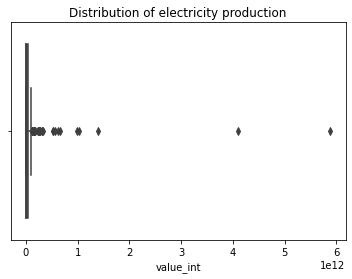

In [107]:
sns.boxplot(elec_prod_2016['value_int']).set_title('Distribution of electricity production')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: ignored

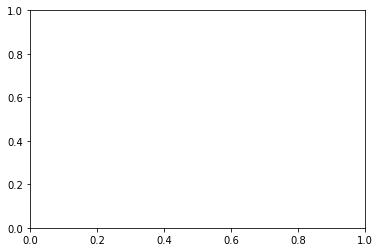

In [112]:
for i in elec_prod_2016['region'].unique():
  plt.hist(np.log(elec_prod_2016[elec_prod_2016['region'] == i]['value_int']))
  plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of log electricity production')

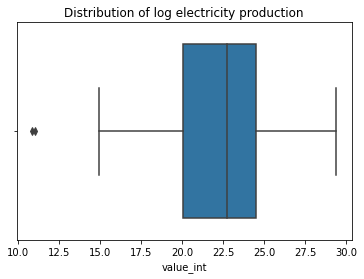

In [106]:
sns.boxplot(np.log(elec_prod_2016['value_int'])).set_title('Distribution of log electricity production')

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of log electricity production')

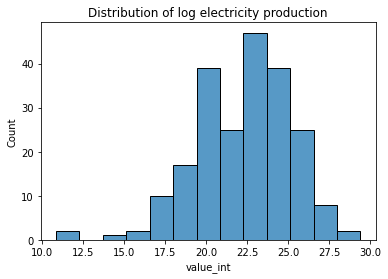

In [105]:
sns.histplot(np.log(elec_prod_2016['value_int'])).set_title('Distribution of log electricity production')

In [17]:
emdat

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,2000-0372-CHN,2000,372,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,19000.0,29898.0,63.549547,1;2,914,13006;13009;13010,"Jiangxi Sheng (Adm1). Quanzhou, Xiamen, Zhangz..."
1,2000-9186-AFG,2000,9186,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,50.0,79.0,63.549547,1,272;273;274;277;279;281;282;285;287;289;293;29...,NaN,"Badakhshan, Badghis, Baghlan, Farah, Ghazni, H..."
2,2000-0373-BGD,2000,373,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.549547,2,NaN,5770;5772,"Chittagong, Cox's Bazar (Adm2)."
3,2000-0905-BOL,2000,905,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.549547,1,40444;40445;40446;40447;40448;40450,NaN,"Chuquisaca, Cochabamba, La Paz, Oruro, Potosi,..."
4,2000-0019-BRA,2000,19,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.549547,2,NaN,8467;8555;9902;9956;9961;9985;11089;11543,"Barra Mansa, Campos Do Jordao, Pirangucu, Rese..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9207,2022-0077-ZAF,2022,77,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9208,2022-0108-ZAF,2022,108,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2708,NaN,Gauteng (Adm1).
9209,2022-0255-COD,2022,255,NaN,Natural,Biological,Epidemic,Viral disease,NaN,Plague,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,14992,Ituri (Adm2).
9210,2022-0263-COD,2022,263,EP-2022-000205,Natural,Biological,Epidemic,Viral disease,NaN,Ebola Virus Disease,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
emdat.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9212 entries, 0 to 9211
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     9212 non-null   object 
 1   Year                                       9212 non-null   int64  
 2   Seq                                        9212 non-null   int64  
 3   Glide                                      1640 non-null   object 
 4   Disaster Group                             9212 non-null   object 
 5   Disaster Subgroup                          9212 non-null   object 
 6   Disaster Type                              9212 non-null   object 
 7   Disaster Subtype                           7804 non-null   object 
 8   Disaster Subsubtype                        722 non-null    object 
 9   Event Name                                 2294 non-null   object 
 10  Country                 

Text(0.5, 1.0, 'Distribution of natural disasters by disaster type')

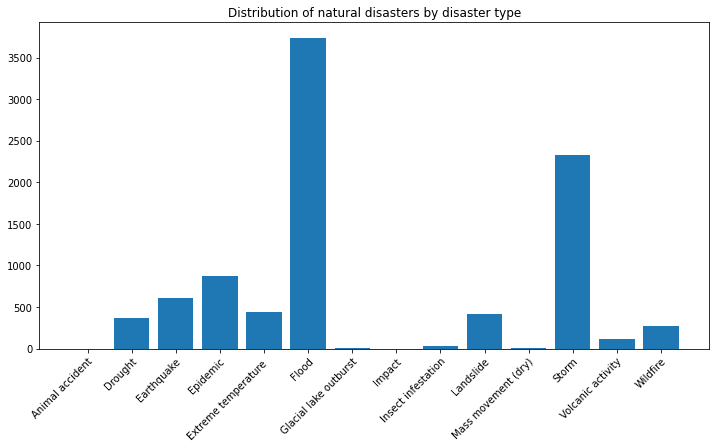

In [108]:
disaster_types = emdat.groupby('Disaster Type').agg('size').reset_index()
plt.figure(figsize=(12, 6))
plt.bar(disaster_types['Disaster Type'], disaster_types[0])
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.title('Distribution of natural disasters by disaster type')

In [63]:
disaster_count = emdat.groupby('Disaster Type').agg('count').reset_index()
disaster_count['Proportion of events with reported damages'] = disaster_count['Total Damages (\'000 US$)'] / disaster_types[0]
disaster_count['Total count'] = disaster_types[0]
disaster_count[['Disaster Type', 'Total count', 'Proportion of events with reported damages']].sort_values('Proportion of events with reported damages', ascending=False)

,Disaster Type,Total count,Proportion of events with reported damages
7,Impact,1,1.000000
11,Storm,2331,0.518233
6,Glacial lake outburst,2,0.500000
2,Earthquake,608,0.437500
13,Wildfire,274,0.401460
5,Flood,3736,0.293094
1,Drought,368,0.274457
12,Volcanic activity,120,0.166667
9,Landslide,411,0.114355
4,Extreme temperature,442,0.095023


Text(0.5, 1.0, 'Distribution of Total People Affected in All Natural Disasters')

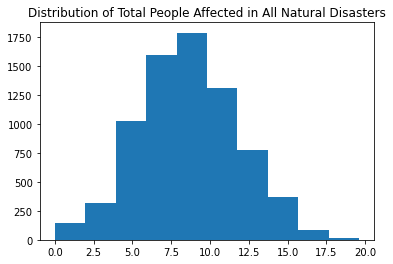

In [110]:
plt.hist(np.log(emdat['Total Affected']))
plt.title('Distribution of Total People Affected in All Natural Disasters')

Text(0.5, 1.0, 'Log Total Damages as a Function of Log Total Affected')

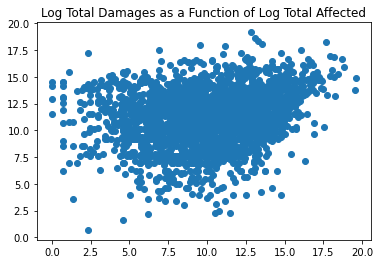

In [111]:
plt.scatter(np.log(emdat['Total Affected']), np.log(emdat['Total Damages (\'000 US$)']))
plt.title('Log Total Damages as a Function of Log Total Affected')

In [84]:
emdat_regional = emdat.groupby(['Region', 'Disaster Subgroup']).agg('size').reset_index()

In [87]:
labels = emdat_regional['Region'].unique()

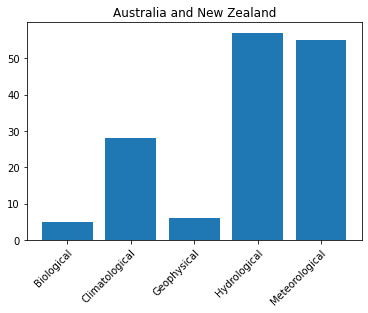

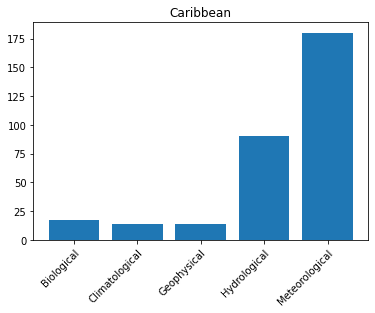

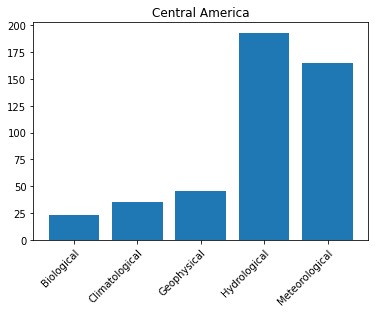

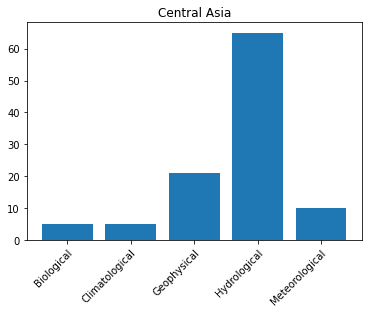

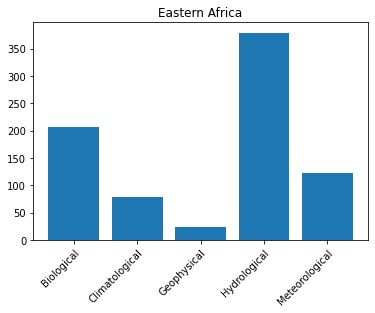

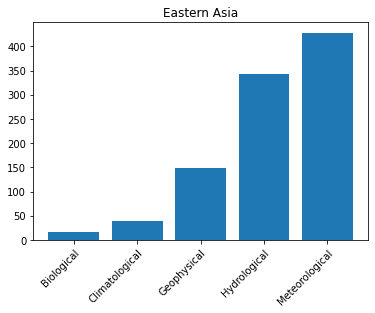

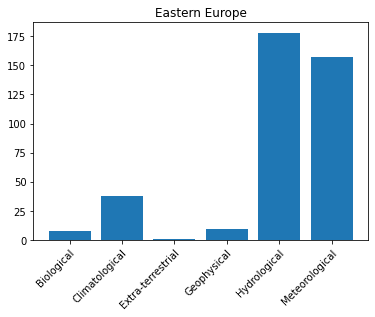

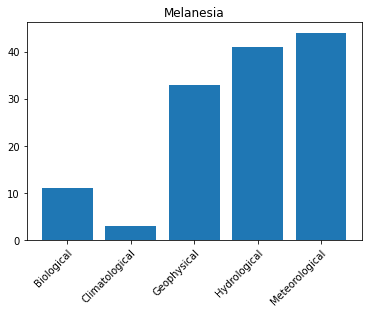

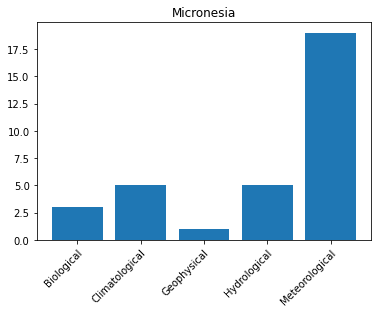

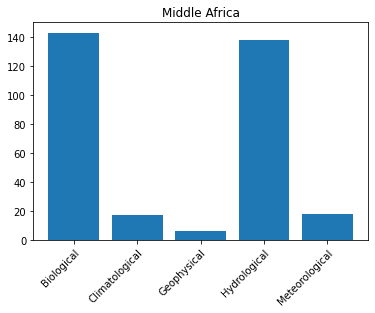

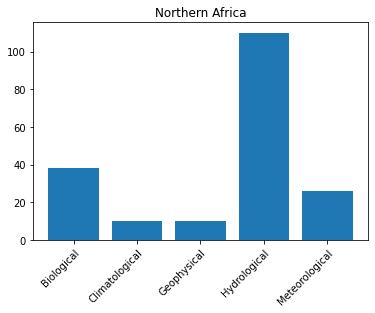

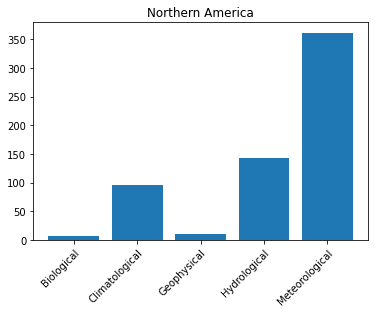

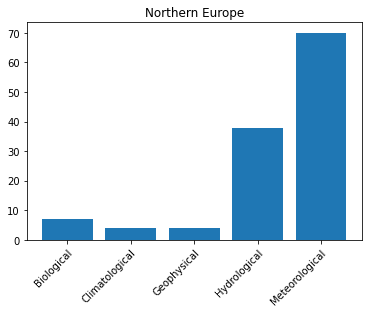

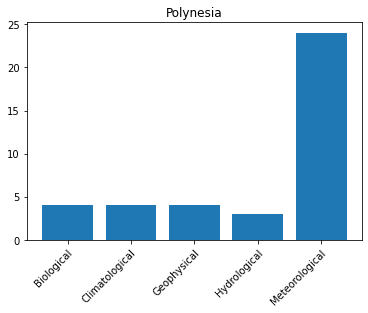

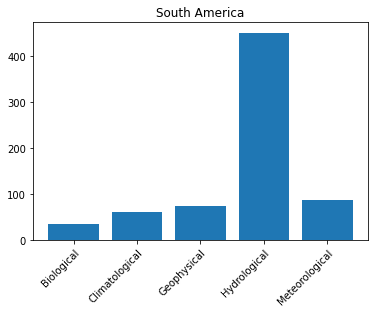

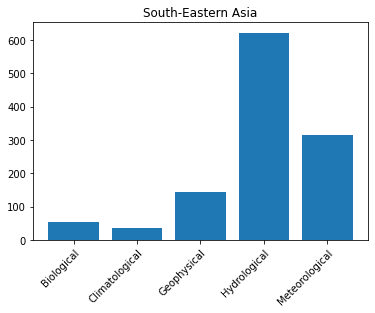

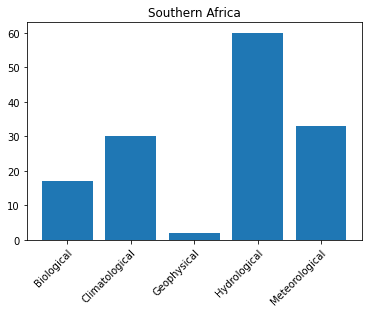

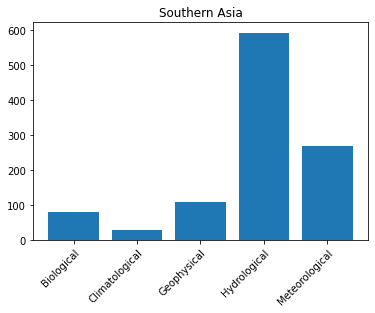

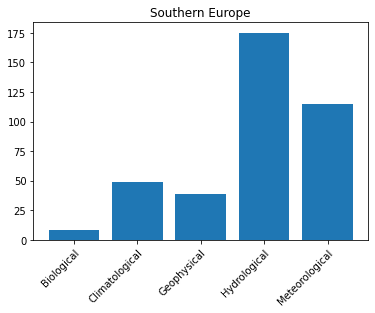

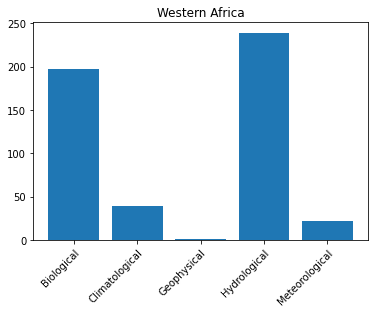

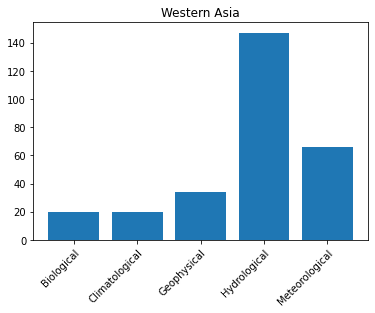

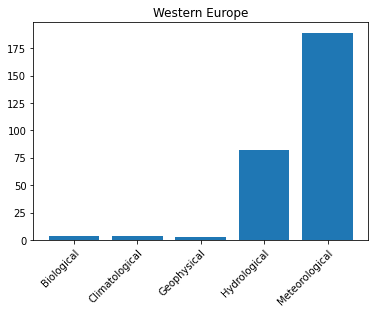

In [104]:
#fig, axes = plt.subplots(4, 6)
for i in labels:
  temp = emdat_regional[emdat_regional['Region'] == i]
  plt.title(i)
  plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
  temp
  plt.bar(temp['Disaster Subgroup'], temp[0])
  plt.show()

In [103]:
len(labels)

22